# Exploratory Data Analysis

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression 
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read in the data sets

In [3]:
#Import Dataframes
ask_trans = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-3-master/Project 3 Submission/Data/asktrans_clean.csv')
ask_trans.head()

,title,auth,subreddit,text
0,What's the difference between transitioning wo...,SnooChocolates8273,asktransgender,When I look at a beautiful woman I see a beaut...
1,Did you also have this?,HoldTheStocks2,asktransgender,When I was like 10-14 I was searching all over...
2,How many times a week do you dilatate?,Kind_Lemon,asktransgender,"Hello!\n\nI am seven years post-surgical MtF, ..."
3,Coming out to my mother (again),mwnahas,asktransgender,Ive already done it about 1.5 years ago. She w...
4,Foot hurts is it hrt,Anastasia69Sanchez,asktransgender,I heard foot gets smaller . Idk if I'm getting...


In [4]:
ask_trans.describe()

,title,auth,subreddit,text
count,6289,6289,6289,6289
unique,6215,4518,1,6251
top,Am I trans?,Aware_Release_2886,asktransgender,Title
freq,11,38,6289,7


In [5]:
ask_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6289 entries, 0 to 6288
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      6289 non-null   object
 1   auth       6289 non-null   object
 2   subreddit  6289 non-null   object
 3   text       6289 non-null   object
dtypes: object(4)
memory usage: 196.7+ KB


In [6]:
rainbow = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-3-master/rainbow_clean.csv')
rainbow.head()

,title,auth,subreddit,text
0,I created an Omegle Clone that actually helps ...,lolroofus,ainbow,
1,My boyfriend came out to me as bi,glassAdvertiser,ainbow,"Hi everyone, I really need some advice! \n\nMy..."
2,A celebration of a queen,Max_E_Mas,ainbow,If you are not up to date on Jeopardy I sugges...
3,"Thank you, old queer people",Wonderful_Toes,ainbow,Thank you for the chance you've given so many ...
4,Did any of you actively avoid LGBTQ things/peo...,ivegotyoupegged,ainbow,I've had this issue for the better part of a y...


In [7]:
rainbow.describe()

,title,auth,subreddit,text
count,6010,6029,6029,6029
unique,5869,3315,1,2111
top,Join the mLab study!,bi_dad48,ainbow,
freq,9,271,6029,3902


In [4]:
combo_clean = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-3-master/Project 3 Submission/Data/combo_clean.csv')
combo_clean.head()

,title,auth,subreddit,text,is_asktransgender
0,What's the difference between transitioning wo...,SnooChocolates8273,asktransgender,When I look at a beautiful woman I see a beaut...,1
1,Did you also have this?,HoldTheStocks2,asktransgender,When I was like 10-14 I was searching all over...,1
2,How many times a week do you dilatate?,Kind_Lemon,asktransgender,"Hello!\n\nI am seven years post-surgical MtF, ...",1
3,Coming out to my mother (again),mwnahas,asktransgender,Ive already done it about 1.5 years ago. She w...,1
4,Foot hurts is it hrt,Anastasia69Sanchez,asktransgender,I heard foot gets smaller . Idk if I'm getting...,1


# Data Descriptions

In [9]:
combo_clean['title'].describe()

count        12299
unique       12061
top       Question
freq            13
Name: title, dtype: object

In [10]:
ask_trans['title'].describe()

count            6289
unique           6215
top       Am I trans?
freq               11
Name: title, dtype: object

In [11]:
rainbow['title'].describe()

count                     6010
unique                    5869
top       Join the mLab study!
freq                         9
Name: title, dtype: object

In [13]:
combo_clean['title_length'] = combo_clean['title'].str.len()
combo_clean.head()

,title,auth,subreddit,text,is_asktransgender,title_length
0,What's the difference between transitioning wo...,SnooChocolates8273,asktransgender,When I look at a beautiful woman I see a beaut...,1,66.0
1,Did you also have this?,HoldTheStocks2,asktransgender,When I was like 10-14 I was searching all over...,1,23.0
2,How many times a week do you dilatate?,Kind_Lemon,asktransgender,"Hello!\n\nI am seven years post-surgical MtF, ...",1,38.0
3,Coming out to my mother (again),mwnahas,asktransgender,Ive already done it about 1.5 years ago. She w...,1,31.0
4,Foot hurts is it hrt,Anastasia69Sanchez,asktransgender,I heard foot gets smaller . Idk if I'm getting...,1,20.0


In [14]:
combo_clean['title_length'].sum()


740734.0

In [15]:
combo_clean.nlargest(10, 'title_length')

,title,auth,subreddit,text,is_asktransgender,title_length
12103,Being trans in America is hell. Its nothing sh...,Madie_Evelyn,ainbow,,0,309.0
7063,[An Exploration Into the Conflicts of Gender D...,sisimurra,ainbow,,0,303.0
6556,Ho Ho Ho! If you want to listen to a Queer Hol...,Derryzumi,ainbow,,0,302.0
7467,"qFlix Phily premiers 'Jump, Darling' - With qF...",PhillyGayCalendar,ainbow,,0,301.0
8907,If you're looking for a queer as hell D&amp;D ...,Derryzumi,ainbow,,0,301.0
1728,Is it considered offensive to use gender neutr...,sheepysheep55,asktransgender,"I wasn't trying to offend anyone, I just don't...",1,300.0
4854,Does anyone have any recommendations for philo...,NightOnFuckMountain,asktransgender,"Full disclosure I'm not trans, I am intersex; ...",1,300.0
5090,Felt physically sick reading an article publis...,AutumnTheTired,asktransgender,As always I fell victim to reading the comment...,1,300.0
6764,This gay brother is still in much pain for mon...,Winny256,ainbow,,0,300.0
6831,I Need help to do more natural poses. How shou...,pasi_kristian,ainbow,,0,300.0


In [16]:
combo_clean.nsmallest(10, 'title_length')

,title,auth,subreddit,text,is_asktransgender,title_length
54,.,Harmonygirl82,asktransgender,https://www.reddit.com/r/lgbt/comments/scsnim/...,1,1.0
7067,.,Dr_Trident,ainbow,,0,1.0
10017,.,Leopoldo_Videla,ainbow,,0,1.0
10620,=,Any-Acanthisitta-475,ainbow,,0,1.0
6839,Me,Adryan_NS,ainbow,,0,2.0
7212,hi,tsgoddessjennauk,ainbow,,0,2.0
7468,Ok,Mean-Technician-3140,ainbow,,0,2.0
8120,:),Masrout,ainbow,,0,2.0
8147,Do,WonderFrog25,ainbow,The reason why I say Do is because life ant as...,0,2.0
8198,:),QUIN_THE_DM,ainbow,,0,2.0


# Charts & Graphs

**Observations:**
The histograph shows that the distribution of the title length is skewed. Another observation is that I notice most title characters length are in the 50's, anything after that is not read nor answered

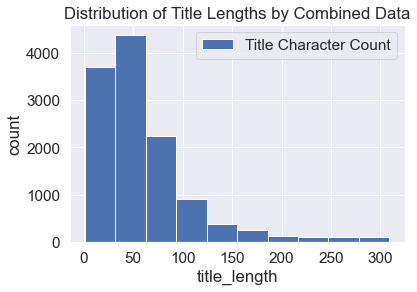

In [36]:
#The distribution of the Title Lengths

plt.hist(combo_clean['title_length'], label='Title Character Count')
#plt.plot(hist3.history['val_accuracy'], label='Test')
plt.ylabel('count');
plt.xlabel('title_length');
plt.legend()
plt.title('Distribution of Title Lengths by Combined Data');

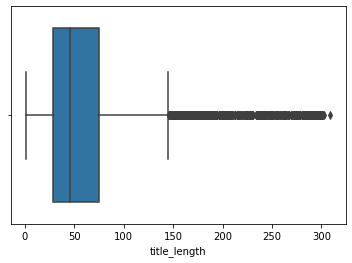

In [19]:
#Noticed that there are many outliers within this boxplot

sns.boxplot(x=combo_clean['title_length']);

In [20]:
#Creating column of title length

ask_trans['title_length'] = ask_trans['title'].str.len()
ask_trans.head(2)

,title,auth,subreddit,text,title_length
0,What's the difference between transitioning wo...,SnooChocolates8273,asktransgender,When I look at a beautiful woman I see a beaut...,66
1,Did you also have this?,HoldTheStocks2,asktransgender,When I was like 10-14 I was searching all over...,23


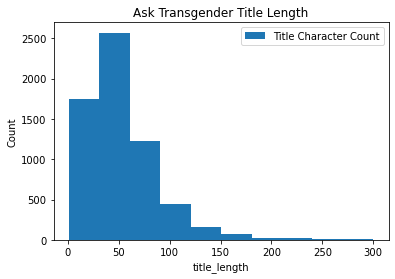

In [21]:
#Histo for asktransgender

plt.hist(combo_clean['title_length'], label='Title Character Count')
#plt.plot(hist3.history['val_accuracy'], label='Test')
plt.ylabel('count');
plt.xlabel('title_length');
plt.legend()
plt.title('Distribution of Title Lengths by Combined Data');plt.hist(combo_clean['title_length'], label='Title Character Count')

In [ ]:
#Boxplot for asktransgender
sns.boxplot(x=ask_trans['title_length']);
plt.bar_label(title_length)

In [23]:
#Creating title length column for the rainbow subreddit

rainbow['title_length'] = rainbow['title'].str.len()
rainbow.head(2)

,title,auth,subreddit,text,title_length
0,I created an Omegle Clone that actually helps ...,lolroofus,ainbow,,62.0
1,My boyfriend came out to me as bi,glassAdvertiser,ainbow,"Hi everyone, I really need some advice! \n\nMy...",33.0


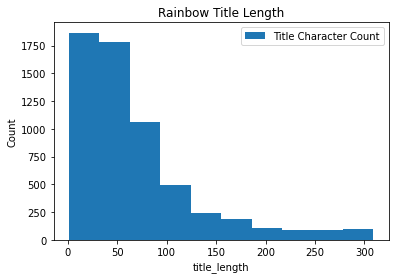

In [24]:
#Notcing that this histo is skewed just like the combo df as well

plt.hist(rainbow['title_length'], label='Title Character Count')
plt.ylabel('Count');
plt.xlabel('title_length');
plt.legend()
plt.title('Rainbow Title Length');

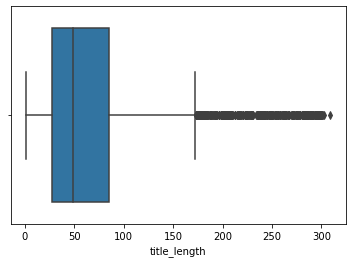

In [25]:
#Boxplot for rainbow with many outliers

sns.boxplot(x=rainbow['title_length']);

In [26]:
#pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

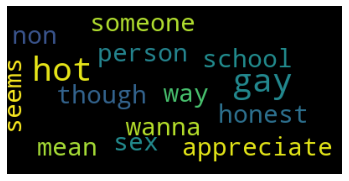

In [28]:
from wordcloud import WordCloud 

text = rainbow['title'][30]

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

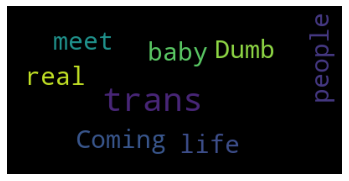

In [29]:
text = ask_trans['title'][6284]

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

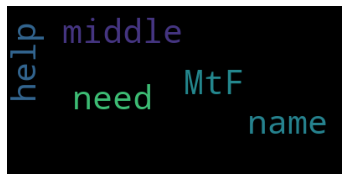

In [30]:
text = ask_trans['title'][111]

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [31]:
combo_clean

,title,auth,subreddit,text,is_asktransgender,title_length
0,What's the difference between transitioning wo...,SnooChocolates8273,asktransgender,When I look at a beautiful woman I see a beaut...,1,66.0
1,Did you also have this?,HoldTheStocks2,asktransgender,When I was like 10-14 I was searching all over...,1,23.0
2,How many times a week do you dilatate?,Kind_Lemon,asktransgender,"Hello!\n\nI am seven years post-surgical MtF, ...",1,38.0
3,Coming out to my mother (again),mwnahas,asktransgender,Ive already done it about 1.5 years ago. She w...,1,31.0
4,Foot hurts is it hrt,Anastasia69Sanchez,asktransgender,I heard foot gets smaller . Idk if I'm getting...,1,20.0
...,...,...,...,...,...,...
12313,Lesbian androgyny in summer!,ShoshiWB,ainbow,,0,29.0
12314,Hang out with Orange Is The New Black's very o...,savetheworld111,ainbow,,0,153.0
12315,Pride flag banned on DoD installations,guisar,ainbow,,0,38.0
12316,LGBT under The Obama Administration 2009 - 201...,CreakeyBroomwood,ainbow,,0,73.0


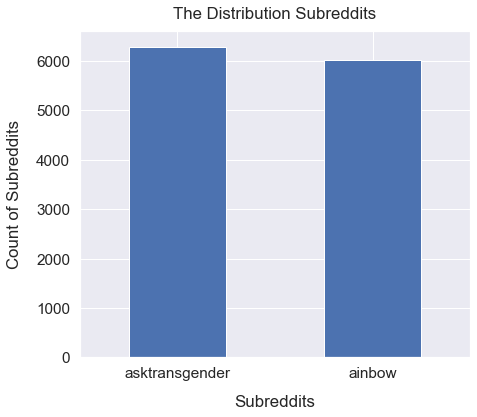

In [32]:
#Relationship between the count of subbreddits

sns.set(font_scale=1.4)
combo_clean['subreddit'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Subreddits", labelpad=14)
plt.ylabel("Count of Subreddits", labelpad=14)
plt.title("The Distribution Subreddits", y=1.02);